In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$S(\omega_{t_d})=2S_{max}\left|\frac{2ln2}{t_p^2}\int_{-\infty}^{\infty}g(t'-t_d)\left[\int_{-t_0}^{\infty}\sum_{j=1}^{n}e^{-(t'-\theta)\left(\frac{1}{T_{2j}}+i\Delta\omega_j\right)}g^2(\theta)H(t'-\theta)d\theta\right]dt'\right|^2$$

In [2]:
def g(t,sigma_t):
    """Gaussian function in time domain"""
    return np.exp(-t**2 / (2 * sigma_t**2))
def H(t):
    """Heaviside step function"""
    return np.where(t >= 0, 1, 0)

In [6]:
S_max = 1
td_array = np.linspace(-5, 5, 100)
T2 = 0.5
om1,om2 = 1, 1.1
sigma_t = 0.1
tp = np.linspace(-2, 5, 100)
theta = np.linspace(-2, 5, 100)
S = np.zeros_like(td_array)
for i,td in enumerate(td_array):
    S1 = 0
    for tp_i in tp:
        S2 = 0
        for theta_i in theta:
            S2 += np.exp(-(tp_i + theta_i)/T2)*g(theta_i, sigma_t)**2*H(tp_i - theta_i)*(theta[1]-theta[0])
        S1 += S2 * g(tp_i - td, sigma_t) * (tp[1]-tp[0])
    S[i] = 2 * S_max * (2 * np.log(2) / sigma_t**2 * S1)**2

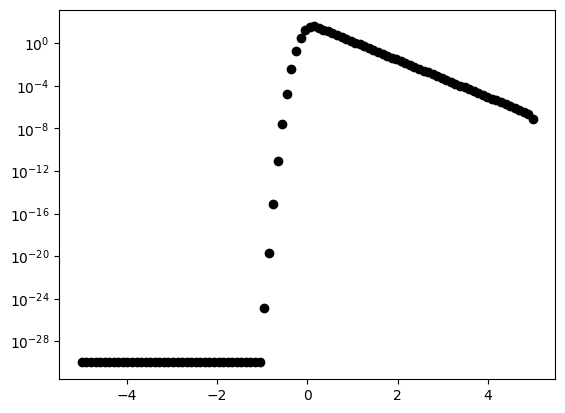

In [7]:
plt.plot(td_array, S+1e-30, 'ok')
plt.yscale('log')